**Pneumonia Detection in Deep Learning**

**Tools and Technologies**

1. VGG16: It is n easy and boradly used Convolutional Neural Network (CNN) Architecture used for ImageNet which is a huge visible database mission utilized in visual object recognition software research

2. Transfer Learning(TL): It is a technique in deep learning that focuses on taking a pre-trained neural network and storing knowledge gained while solving one problem and applying it to new different datasets. In this article, knowledge gained while learning to recognize 1000 different classes in ImageNet could apply when trying to recognize the disease.

**Modern Architecture**

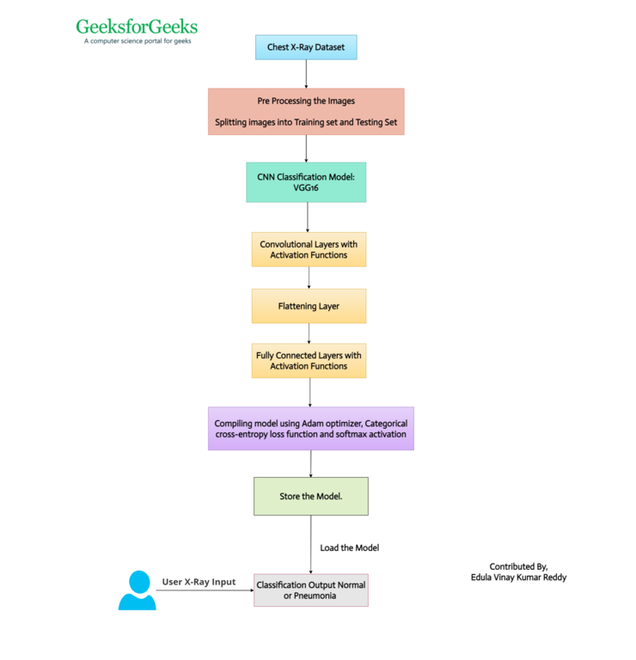

**Mopdules Required**

1. Keras: It is a Python module for deep learning that runs on the top of TensorFlow library. It was created to make implementing deep learning models as easy and fast as possible for research and development. Being the fact that Keras runs on top of Keras we have to install TensorFlow first. To install this library, type the following commands in IDE/terminal.

In [ ]:
! pip install tensorflow
! pip install keras

2. SciPy: SciPy is a free and open-source Python module used for technical and scientific computing. As we require Image Transformations in this articcle we have to install SciPy module.

In [ ]:
! pip install scipy

3. glob: In Python, the glob module is used to retrieve files/pathnames matching a specified pattern. To find how many classes are present in our train dataset folder we use this module in this article.

In [ ]:
! pip install glob2

**Stepwise Implementation**

Step 1: The dataset contains Test, Train, Validation folders. We will use test and train datasets for training our model. Then we will verify our model using the validation dataset.

Step 2: Import all the necessary modules that are available in keras like ImageDataGenerator, Model, Dense, Flatten and all. We will be creating a generic code which means that we just have to change the library name then our code will automatically work with respect to VGG16, VGG19 and resnet50.

In [2]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob

Now we will use the Kaggle API to download the dataset to the system. First, we will require the API key. To do this just navigate to the profile section in Kaggle and download the JSON file containing your details for API, after that just upload this to colab or locate in the local Jupyter environment.

In [ ]:
# Install Kaggle module
! pip install Kaggle

In [3]:
# Upload API details json file to Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maulanarhodes","key":"f9d2ee8849ac44d8ebd04ae8bc30b3db"}'}

In [4]:
# creating kaggle directory and moving the json files there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the Dataset
! kaggle datasets download -d subho117/pneumonia-detection-using-deep-learning

Dataset URL: https://www.kaggle.com/datasets/subho117/pneumonia-detection-using-deep-learning
License(s): MIT
100% 1.14G/1.14G [01:03<00:00, 20.3MB/s]
100% 1.14G/1.14G [01:03<00:00, 19.3MB/s]


Now we unzip the dataset into the desired folder.

In [17]:
! unzip pneumonia-detection-using-deep-learning.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
 

Step 3: After this, we will provide our image size i.e. 224 X 224. This is a fixed-size for VGG16 architecture. 3 signifies that we are working with RGB type of images. Then we will provide our training and testing data path.

In [6]:
IMAGESHAPE = [224, 224, 3]
training_data = '/data/chest_xray/train'
testing_data = 'data/chest_xray/test'

Step 4: Now, we will import VGG16 model. While importing we will use the weights of the imageNet & include_top=False. This signifies that we do not want to classify 1000 different categories present in imageNet. Our problem is all about two categories Pneumonia and Normal that's why we are just dropping the first and last layers then we will just design our own layers and aadd it to VGG16.

In [7]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Step 5: After importing VGG16 model, we have to make this important chsnge. By using the for loop iterating over all layers and setting the trainable as False, so that all the layers would not be trained.

In [8]:
for each_layer in vgg_model.layers:
    each_layer.trainable = False

Step 6: Now we will try to see how many classes are present in our train dataset to understand how many output labels we should have.

In [9]:
classes = glob('/data/chest_xray/train/*')

Step 7: As we deleted the first and the last columns in the previous step,  we will just make a flattened layer and finally we just add our last layer with a softmax activation function. len(classes) indicate how many categories we have in our output layer.

In [10]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)

Step 8: Now we will combine the VGG output and prediction. This altogether will create a model. When we check the model summary we can observe that the last layer has only rwo categories.

In [11]:
final_model = Model(inputs=vgg_model.input, outputs=prediction)
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 0)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Step 9: Now we will compile our model using Adam Optimizer and optimization metric as accuracy.

In [12]:
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Step 10: After compiling the model, we have to import our dataset to Keras using ImageDataGenerator in Keras. For creating additional features we use metrics like rescale, shear_range, zoom_range. These will help us in the training and testing phases.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale = 1./255)

Step 11: Now we will insert the images using flow_from_directory() function. Mkae sure that we have the same image size as we initiated earlier. Batch size 4 indicates that at once 4 images will be given for training. Class_mode is Categorical i.e. either Pneumonia or Not Pneumonia.

In [18]:
training_set = train_datagen.flow_from_directory('/content/data/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')


Found 5232 images belonging to 2 classes.


Step 12: Similarly, we will do the same for the test dataset.

In [19]:
test_set = testing_datagen.flow_from_directory('/content/data/chest_xray/test',
                                               target_size = (224, 224),
                                               batch_size = 4,
                                               class_mode = 'categorical')

Found 624 images belonging to 2 classes.


Step 13: Finally, we are fitting the model using fit_generator() functiomn and passing all the necessary details regarding our training and testing dataset as arguments.

In [20]:
# Add a final Dense layer with 2 units (for 2 classes) amd softmax activation
from keras.layers import Dense, Input
from keras.models import Model

# Assuming 'base-model' is your existing Functional model without the final Dense layer
# Get the input tensor ffor your base model
input_tensor = final_model.input

# Get the output tensor of the base model
base_model_output = final_model.output

# Add the new Dense layer
predictions = Dense(units=2, activation='softmax')(base_model_output)

# Create a new Functional model with the added layer
final_model = Model(inputs=input_tensor, outputs=predictions)

#Re-compile the model after adding the Dense layer
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fitted_model = final_model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1308/1308 ━━━━━━━━━━━━━━━━━━━━ 111s 82ms/step - accuracy: 0.7292 - loss: 0.6320 - val_accuracy: 0.6250 - val_loss: 0.6825
Epoch 2/5
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1308/1308 ━━━━━━━━━━━━━━━━━━━━ 107s 81ms/step - accuracy: 0.7426 - loss: 0.5711 - val_accuracy: 0.6250 - val_loss: 0.6915
Epoch 4/5
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.7307 - loss: 0.5827 - val_accuracy: 0.6250 - val_loss: 0.6958


Step 14: Create a model file and store this model.

**Save The Model**

In [21]:
final_model.save('our_model.h5')

In [22]:
final_model.save('our_model.keras')